Predicted Suicide Rate for 2025: 12.81
Predicted Suicide Rate for 2026: 12.78
Predicted Suicide Rate for 2027: 12.74
Mean Squared Error (MSE) on test set: 112.97314099014295
R-squared (R2) Score on test set: 0.006293567248885523


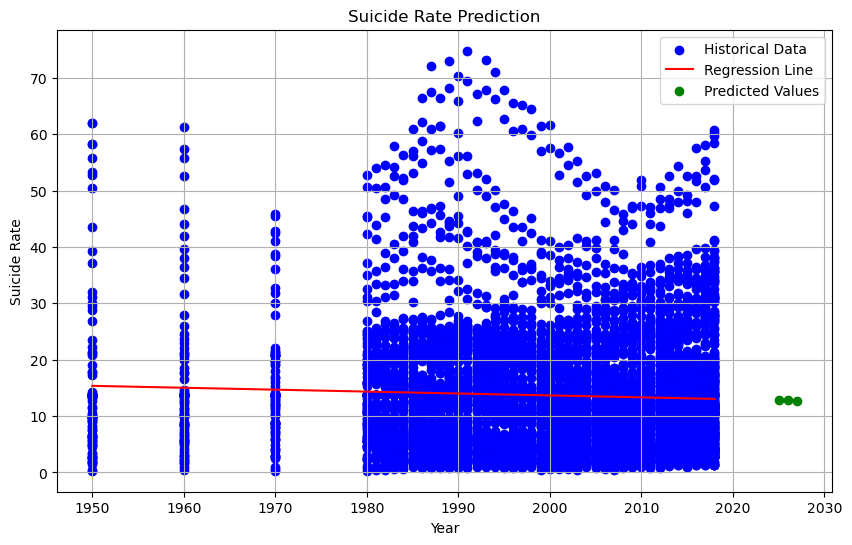

In [16]:
#Fail model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('E:\Downloads\DV FINAL PROJECT\Death_rates_by_suicide.csv')


X = data[['YEAR']].values.reshape(-1, 1)  
y = data['ESTIMATE'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)




future_years = np.array([[2025], [2026], [2027]])

future_suicide_rates = model.predict(future_years)

for year, suicide_rate in zip(range(2025, 2028), future_suicide_rates):
    print(f"Predicted Suicide Rate for {year}: {suicide_rate:.2f}")


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)    
print("Mean Squared Error (MSE) on test set:", mse)
print("R-squared (R2) Score on test set:", r2)    
    
    
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Historical Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')

plt.scatter(future_years, future_suicide_rates, color='green', label='Predicted Values')

plt.title('Suicide Rate Prediction')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.legend()
plt.grid(True)
plt.show()


Predicted Suicide Rate for 2025: 3.36
Predicted Suicide Rate for 2026: 3.36
Predicted Suicide Rate for 2027: 3.36
Mean Squared Error (MSE) on test set: 60.37037972879846
R-squared (R2) Score on test set: 0.4689849803382138


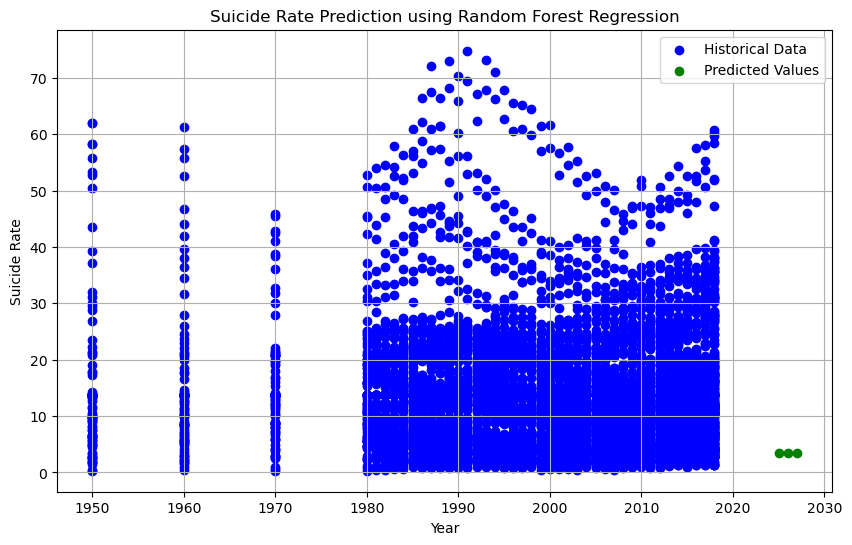

In [6]:
#Fail model
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('E:\Downloads\DV FINAL PROJECT\Death_rates_by_suicide.csv')

X = data[['YEAR', 'Gender', 'AGE']] 
y = data['ESTIMATE'] 

X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


future_years = np.array([[2025], [2026], [2027]])


future_X = pd.DataFrame({'YEAR': future_years.flatten(), 'Gender': 'Male', 'AGE': '10-14 years'})


future_X = pd.get_dummies(future_X)


missing_cols = set(X_train.columns) - set(future_X.columns)
for col in missing_cols:
    future_X[col] = 0


future_X = future_X[X_train.columns]


future_suicide_rates = model.predict(future_X)


for year, suicide_rate in zip(range(2025, 2028), future_suicide_rates):
    print(f"Predicted Suicide Rate for {year}: {suicide_rate:.2f}")
print("Mean Squared Error (MSE) on test set:", mse)
print("R-squared (R2) Score on test set:", r2)

plt.figure(figsize=(10, 6))


plt.scatter(data['YEAR'], data['ESTIMATE'], color='blue', label='Historical Data')


plt.scatter(future_years, future_suicide_rates, color='green', label='Predicted Values')

plt.title('Suicide Rate Prediction using Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('Suicide Rate')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
#joblib.dump(model, 'LinearRegression_SuicideRate_Prediction.joblib')  tried to do it for IBM bias check, but CUH and price constraint
#import joblib

Mean Squared Error (MSE) on test set: 55.81240652616184
R-squared (R2) Score on test set: 0.5090766981754862
Predicted Suicide Rate for 2025: 13.70
Predicted Suicide Rate for 2026: 13.67
Predicted Suicide Rate for 2027: 13.64


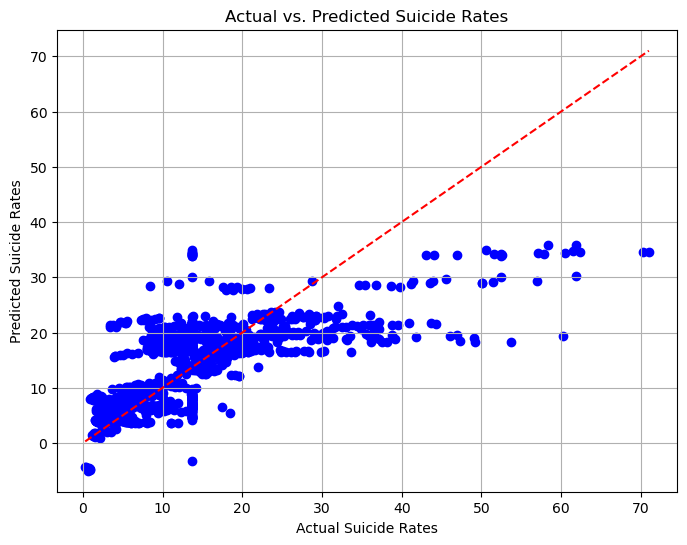

In [36]:
#Success model
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('E:/Downloads/DV FINAL PROJECT/Death_rates_by_suicide.csv')

X = data[['YEAR', 'Gender', 'AGE']] 
y = data['ESTIMATE']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) on test set:", mse)
print("R-squared (R2) Score on test set:", r2)

future_years = [2025, 2026, 2027]
future_suicide_rates = []

# Extract the column names related to 'Gender' after one-hot encoding
gender_columns = [col for col in X_test.columns if 'Gender' in col]

# Extract the column names related to 'AGE' after one-hot encoding
age_columns = [col for col in X_test.columns if 'AGE' in col]

for year in future_years:
    # Create future_data with the same length as X_test
    future_data = pd.DataFrame({'YEAR': [year] * len(X_test)})
    
    # Add one-hot encoded columns for 'Gender'
    for col in gender_columns:
        future_data[col] = 0  # default value here
    
    # Add one-hot encoded columns for 'AGE'
    for col in age_columns:
        future_data[col] = 0  # default value
    
    future_data = pd.get_dummies(future_data)
    
    future_suicide_rate = model.predict(future_data)
    
    future_suicide_rates.append(future_suicide_rate[0])

    print(f"Predicted Suicide Rate for {year}: {future_suicide_rate[0]:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Suicide Rates')
plt.ylabel('Predicted Suicide Rates')
plt.title('Actual vs. Predicted Suicide Rates')
plt.grid(True)
plt.show()